In [45]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind



In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get data 


In [47]:

def get_data_final():

    data_df = pd.read_csv('/workspaces/octave_learner_journet/leraner_journey_final_exam/ds_data_set.csv')

    return data_df

In [48]:
data_df = get_data_final()
data_df

,Gender,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist
0,0,241,64.7,163,34.2,36.2,29.0,89.6
1,0,241,54.0,153,37.2,34.0,26.1,85.5
2,1,241,61.4,165,37.7,35.0,31.4,70.1
3,0,241,74.0,171,37.9,36.2,29.8,91.1
4,0,241,63.6,159,38.1,34.0,29.2,74.3
...,...,...,...,...,...,...,...,...
4974,1,958,89.5,184,43.0,42.8,32.2,112.8
4975,0,959,78.6,151,35.6,34.2,33.5,114.9
4976,1,959,86.5,175,38.6,41.5,32.8,100.2
4977,0,959,58.0,163,40.2,37.5,26.2,82.8


## Question 1

Generate summary statistics tables which consist of extreme values (min & max), standard deviation, median and quartile elements using 

A) All the survey people 

In [49]:
data_df.describe().drop(['count','mean'],axis=0)

,Gender,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist
std,0.499993,197.178091,20.30087,10.033679,4.034445,2.754877,5.208378,15.83276
min,0.000000,241.000000,32.40000,140.000000,23.700000,29.500000,19.500000,59.10000
25%,0.000000,418.000000,67.20000,160.000000,35.700000,35.500000,29.700000,87.50000
50%,0.000000,584.000000,78.80000,167.000000,38.400000,37.400000,32.800000,97.95000
75%,1.000000,748.000000,92.60000,175.000000,41.000000,39.400000,36.100000,108.30000
max,1.000000,959.000000,218.20000,204.000000,55.500000,47.700000,141.100000,172.00000


B) Men only and 

In [50]:
data_df[data_df['Gender']==1].describe().drop(['count','mean'],axis=0).drop('Gender',axis=1)

,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist
std,197.574705,19.665853,7.744141,3.394613,2.380436,4.374639,15.460271
min,241.000000,43.100000,142.000000,29.000000,31.500000,20.300000,64.400000
25%,419.750000,73.475000,169.000000,38.200000,37.500000,31.100000,90.800000
50%,588.000000,84.300000,175.000000,40.300000,39.000000,33.600000,99.800000
75%,749.000000,97.300000,180.000000,42.600000,40.600000,36.600000,110.000000
max,959.000000,218.200000,204.000000,55.500000,47.700000,54.000000,172.000000


C) Women only.

In [51]:
data_df[data_df['Gender']==0].describe().drop(['count','mean'],axis=0).drop('Gender',axis=1)

,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist
std,196.82263,19.369096,7.163543,3.574078,2.187878,5.790063,15.887564
min,241.00000,32.400000,140.000000,23.700000,29.500000,19.500000,59.100000
25%,416.50000,62.100000,156.000000,34.100000,34.500000,28.500000,84.800000
50%,576.00000,72.400000,161.000000,36.500000,36.000000,31.600000,95.300000
75%,747.00000,86.400000,166.000000,38.700000,37.400000,35.400000,107.000000
max,959.00000,190.200000,194.000000,47.700000,44.200000,141.100000,168.400000


# Question 2

"Generally people are commonly described as long/short legged than long/short-armed". Describe whether the above statement is true or false using the survey data.

The question is answered using coefficient of variables


In [52]:
# Calculate the coefficient of variation for Leg Length and Arm Length
cv_leg_length = (data_df['Leg_Length'].std() / data_df['Leg_Length'].mean()) * 100
print(cv_leg_length)
cv_arm_length = (data_df['Arm_Length'].std() / data_df['Arm_Length'].mean()) * 100
print(cv_arm_length)

10.526491414556636
7.350122164256123


In [53]:
data_df['Leg_Length'].mean()

38.32659168507732

In [54]:
data_df['Arm_Length'].mean()

37.48069893552922

In [55]:
data_df['Leg_Length'].std()

4.034445383221842

In [56]:
data_df['Arm_Length'].std()

2.754877159778442

Following are the key statistical parameters to answer this question 

Mean values 
leg_lenght_mean = 38.32659168507732

arm lenght_mean = 37.48069893552922



std
leg_lenght_std = 4.034445383221842

arm lenght_std = 2.754877159778442



Coefficient of variance (CV)
cv_leg = 10.526491414556636

cv_arm = 7.350122164256123


Therefore as the CV of legs are higher than arms it is clear that there is high variability in legs compared to arms 

So people can be commonly described as  long/short legged than 
long/short-armed

Therefore the statement is true



# Question 3

An array of plots of variable pairs provides very interesting insights into the distribution of data values and their correlation. Correlation coefficients between pair of attributes illustrate a linear relationship between each other. Visualize the full array of plots of variable pairs for the above dataset.

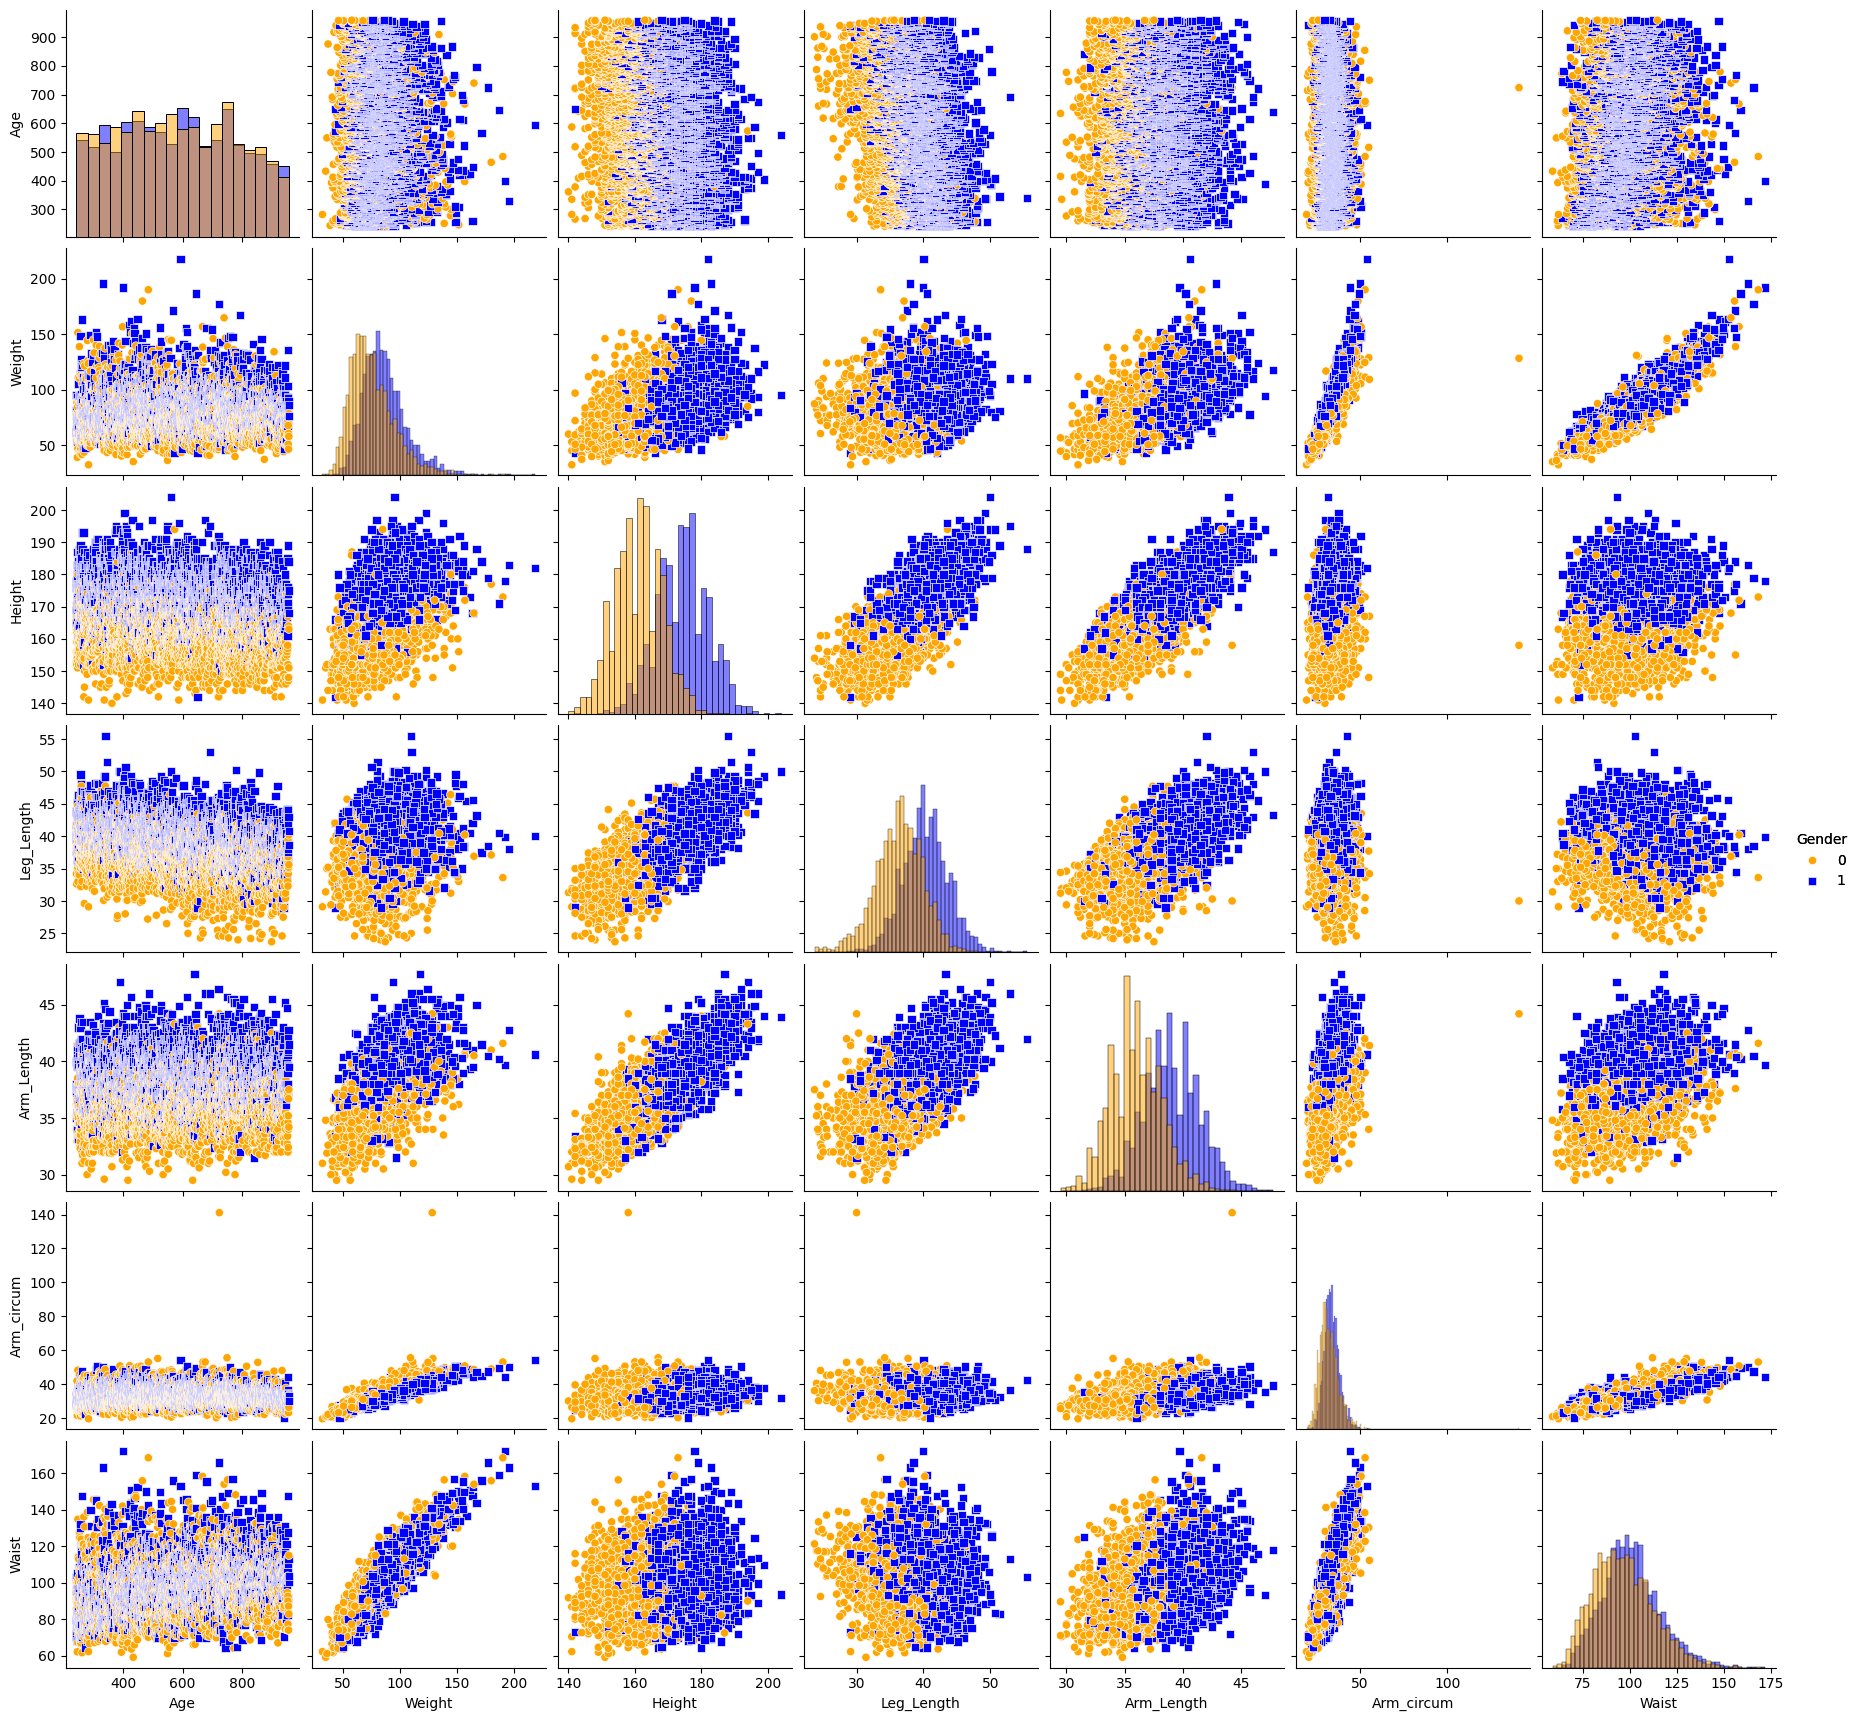

In [57]:
g = sns.pairplot(data_df, hue='Gender', diag_kind='hist', markers=['o', 's'], palette={0: 'orange', 1: 'blue'})

# Add legends
g.add_legend()
plt.show()

# Question 4

Generate pairwise linear correlation matrixes/tables for Men and Women
separately. Provide one key observation.

#### For Men

Text(0.5, 1.0, 'Correlation Heat Map - Men')

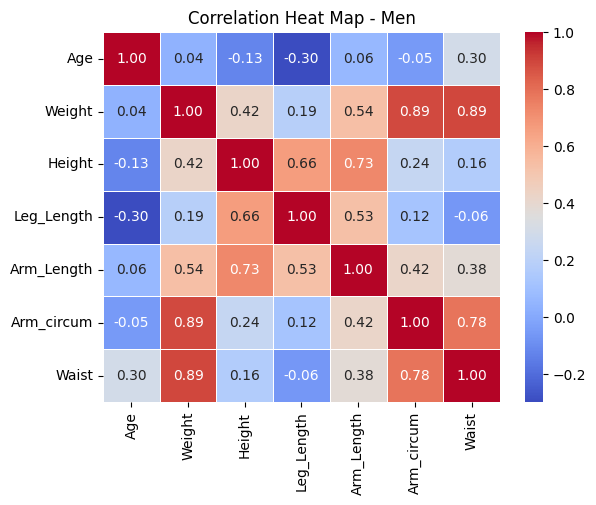

In [58]:
sns.heatmap(data_df[data_df['Gender']==1].drop('Gender',axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heat Map - Men')

### Women

Text(0.5, 1.0, 'Correlation Heat Map - Women')

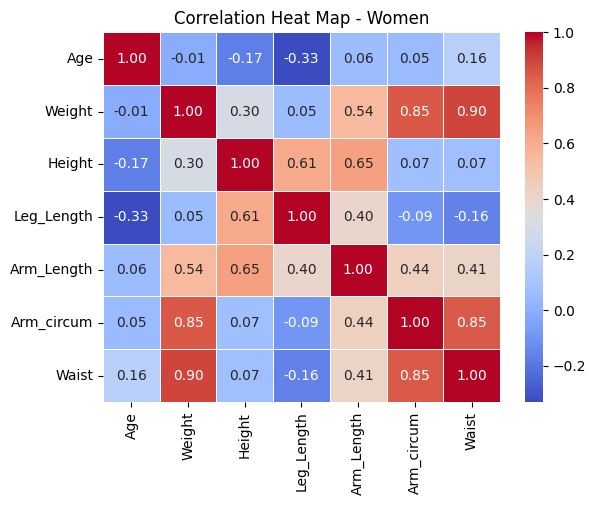

In [59]:
sns.heatmap(data_df[data_df['Gender']==0].drop('Gender',axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heat Map - Women')

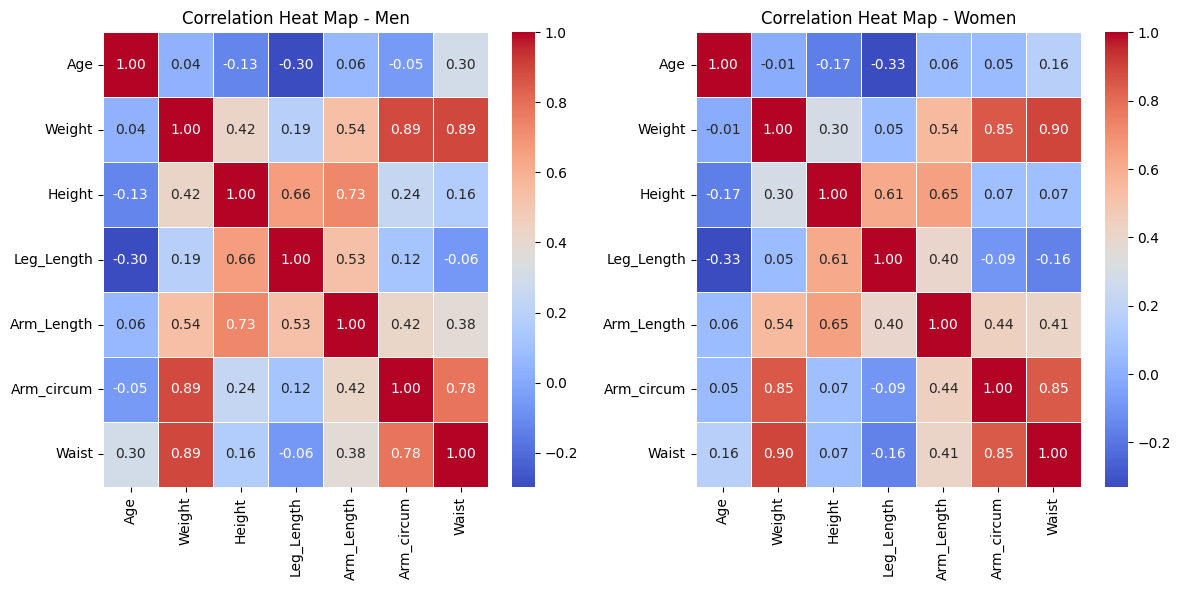

In [60]:
# Making the observations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(data_df[data_df['Gender']==1].drop('Gender',axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heat Map - Men')

plt.subplot(1, 2, 2)
sns.heatmap(data_df[data_df['Gender']==0].drop('Gender',axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heat Map - Women')

plt.tight_layout()
plt.show()

##### Observation made

It is observed that weight has a high correaltion between arm_circumfarance and waist for men and women

# Question 5

Using the provided data you are required to calculate the Body Mass Index (BMI) to measure body fat for these survey people. BMI value is  given by;
 
 $$BMI =  Weight  / Height^2$$

Where Weight is in Kg and Height is in m. According to the health guidelines, BMI value varies and we can be categorized into four
categories as follows:

    if bmi < 18.5:
        category = 'Under weight'
    elif 18.5 <= bmi < 25:
        category = 'Normal'
    elif 25 <= bmi < 30:
        category = 'Overweight'
    else:
        category = 'Obese' 


Write a function that outputs BMI value and respective category for all the survey people and add that column as BMI

In [61]:
def calculate_bmi(weight_kg, height_cm):
    # Convert height to meters as highit is in cm
    height_m = height_cm / 100
    
    # Calculate BMI
    bmi = weight_kg / (height_m ** 2)
    
    # Categorize BMI
    if bmi < 18.5:
        category = 'Under_Weight'
    elif 18.5 <= bmi < 25:
        category = 'Normal'
    elif 25 <= bmi < 30:
        category = 'Overweight'
    else:
        category = 'Obese'
    
    return bmi, category



# Create 'BMI' column and 'BMI Category' column
data_df['BMI'], data_df['BMI_Category'] = zip(*data_df.apply(lambda row: calculate_bmi(row['Weight'], row['Height']), axis=1))
data_df


,Gender,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist,BMI,BMI_Category
0,0,241,64.7,163,34.2,36.2,29.0,89.6,24.351688,Normal
1,0,241,54.0,153,37.2,34.0,26.1,85.5,23.068051,Normal
2,1,241,61.4,165,37.7,35.0,31.4,70.1,22.552801,Normal
3,0,241,74.0,171,37.9,36.2,29.8,91.1,25.306932,Overweight
4,0,241,63.6,159,38.1,34.0,29.2,74.3,25.157233,Overweight
...,...,...,...,...,...,...,...,...,...,...
4974,1,958,89.5,184,43.0,42.8,32.2,112.8,26.435491,Overweight
4975,0,959,78.6,151,35.6,34.2,33.5,114.9,34.472172,Obese
4976,1,959,86.5,175,38.6,41.5,32.8,100.2,28.244898,Overweight
4977,0,959,58.0,163,40.2,37.5,26.2,82.8,21.829952,Normal


# Question 6

National Health and Nutrition Department would like to understand the distribution of survey people in above 4 categories. Plot a bar chart which illustrates the percentage values for above 4 categories for Men and Women

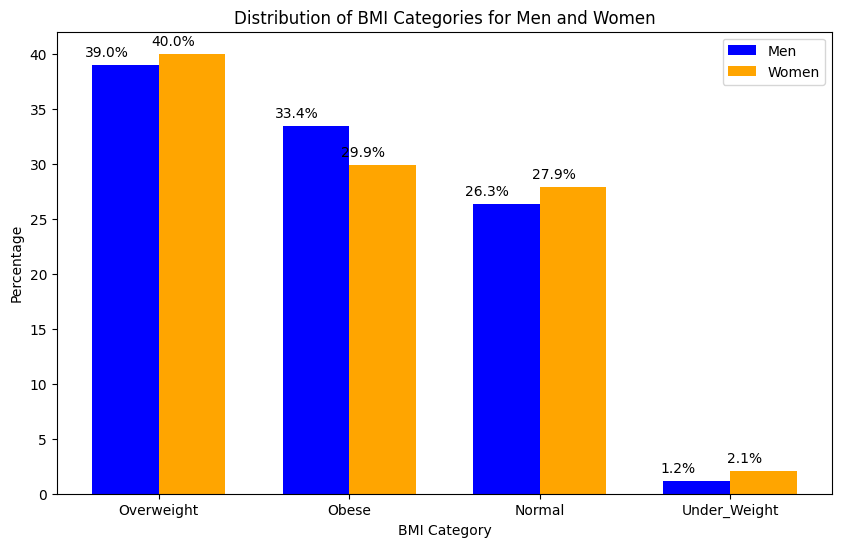

In [62]:
# Create a stacked bar chart
plt.figure(figsize=(10, 6))

men_data = data_df[data_df['Gender'] == 1]['BMI_Category'].value_counts(normalize=True) * 100
women_data = data_df[data_df['Gender'] == 0]['BMI_Category'].value_counts(normalize=True) * 100

bar_width = 0.35
index = range(len(men_data.index))

# Plot bars
men_bars = plt.bar(index, men_data, width=bar_width, label='Men', color='blue', align='center')
women_bars = plt.bar([i + bar_width for i in index], women_data, width=bar_width, label='Women', color='orange', align='center')

# Add values on top of each bar
for bar in men_bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', color='black')

for bar in women_bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', color='black')

plt.xlabel('BMI Category')
plt.ylabel('Percentage')
plt.title('Distribution of BMI Categories for Men and Women')
plt.xticks([i + bar_width / 2 for i in index], men_data.index)
plt.legend()
plt.show()

### Observation

1. from the data it was clear that 72.4% of the male population is obese or overweight and 69.9% percentage of the female population is overweight or obese. This indicates that male population is higher risk for over weight and obese .  Further more it is evident that majority of the population is over weight or obese . Thus specific actions should be taken to maintain a healthy BMI level in the pupulation

2. When it comes to underweight it is apperent that male underweight percentage from its population is 1.2% and female underweight percentage form its population is 2.1% . Thus it is clear that compared to men women are 90% more risk towards underweight. This implies that either women do not get equal opputunitiy interms of food , health education compared or compared to men women do not maintain a good healthy habits to maintain the weight

3. From the data it is apperent that women will maintain a normal weight ( 27.9% of the women are maintaing a normal weight) compared to men (26.3 of the men are maintaing a normal weight)